<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C2/C2.html"><img src="../data/C2_nav.png" width="100"  style="float:right;" alt="C2"></a>
<h1> Complex Numbers</h1> 
</div>

<br/>

<p>
In this notebook, we review some properties of complex numbers. In particular, we need complex numbers in view of a complex-valued formulation of the Fourier transform, which significantly simplifies the proof and the understanding of certain algebraic properties of this transform, see Section 2.3.2 of <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>. 
</p> 

## Basic Definitions

We can write a complex number $c = a + ib$ with real part $\mathrm{Re}(c) = a$, imaginary part $\mathrm{Im}(c) = b$, and imaginary unit $i = \sqrt{-1}$. In Python, the symbol `j` is used to denote the imaginary unit. Furthermore, a coefficient before `j` is needed. To specify a complex number, one can also use the constructor `complex`.

In [1]:
a = 1.5
b = 0.8
c = a + b*1j
print(c)
c2 = complex(a,b)
print(c2)

(1.5+0.8j)
(1.5+0.8j)


Python offers the built-in `math` package for basic processing of complex numbers. As an alternative, we use here the external package `numpy`, which is used later for various purposes.

In [2]:
import numpy as np

print(np.real(c))
print(np.imag(c))

1.5
0.8


A complex number $c = a+ib$ can be plotted as a point $(a,b)$ in the Cartesian coordinate system. This point is often visualized by an arrow starting at $(0,0)$ and ending at $(a,b)$.

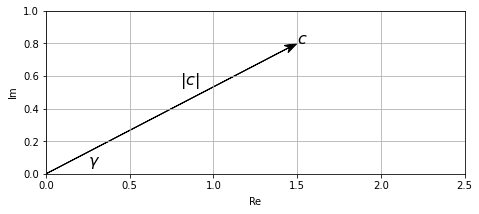

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

def generate_figure(figsize=(2, 2), xlim=[0, 1], ylim=[0, 1]):
    """Generate figure for plotting complex numbers
       Notebook: C2/C2_ComplexNumbers.ipynb"""
    plt.figure(figsize=figsize)
    plt.grid()  
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('$\mathrm{Re}$')
    plt.ylabel('$\mathrm{Im}$');

def plot_vector(c, color='k', start=0, linestyle='-'):
    """Plot arrow corresponding to difference of two complex numbers

    Notebook: C2/C2_ComplexNumbers.ipynb

    Args:
        c: Complex number
        color: Color of arrow
        start: Complex number encoding the start position
        linestyle: Linestyle of arrow

    Returns:
        plt.arrow: matplotlib.patches.FancyArrow
    """    
    return plt.arrow(np.real(start), np.imag(start), np.real(c), np.imag(c), 
              linestyle=linestyle, head_width=0.05, fc=color, ec=color, overhang=0.3, length_includes_head=True)
    

c = 1.5 + 0.8j

generate_figure(figsize=(7.5, 3), xlim=[0, 2.5], ylim=[0, 1])
v = plot_vector(c, color='k')

plt.text(1.5, 0.8, '$c$', size='16')
plt.text(0.8, 0.55, '$|c|$', size='16')
plt.text(0.25, 0.05, '$\gamma$', size='16');

## Polar Representation

The **absolute value** (or **modulus**) of a complex number $a+ib$ is defined by

$$|c| := \sqrt{a^2 + b^2}.$$

The **angle** (given in radians) is given by 

$$\gamma := \mathrm{atan2}(b, a).$$

This yields a number in the interval $(-\pi,\pi]$, which can be mapped to $[0,2\pi)$ by adding $2\pi$ to negative values. The *angle* (given in degrees) is obtained by

$$360 \cdot \frac{\gamma}{2\pi}$$

In [4]:
print('Absolute value:', np.abs(c))
print('Angle (in radians):', np.angle(c))
print('Angle (in degree):', np.rad2deg(np.angle(c)))
print('Angle (in degree):', 180 * np.angle(c)/np.pi )

Absolute value: 1.7
Angle (in radians): 0.48995732625372834
Angle (in degree): 28.07248693585296
Angle (in degree): 28.07248693585296


The complex number $c=a+ib$ is uniquely defined by the pair $(|c|, \gamma)$, which is also called the **polar representation** of $c$. One obtains the Cartesian representation $(a,b)$ from  the polar representation $(|c|,\gamma)$ as follows:

\begin{eqnarray}
a &=& |c| \cdot \cos(\gamma) \\
b &=& |c| \cdot \sin(\gamma)
\end{eqnarray}

## Operations

For two complex numbers  $c_1=a_1+ib_1$ and $c_2=a_2+ib_2$, the sum 

$$
c_1 + c_2 = (a_1 + ib_1) + (a_2 + ib_2) := (a_1 + a_2) + i(b_1 + b_2) 
$$

is defined by summing their real and imaginary parts individually. The geometric intuition of addition can be visualized by a parallelogram:

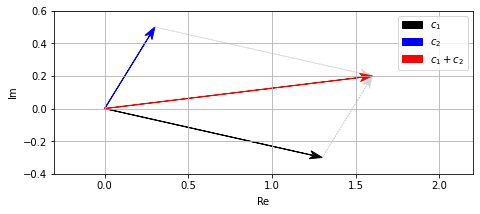

In [5]:
c1 = 1.3 - 0.3j
c2 = 0.3 + 0.5j
c = c1 + c2

generate_figure(figsize=(7.5, 3), xlim=[-0.3, 2.2], ylim=[-0.4, 0.6])
v1 = plot_vector(c1, color='k')
v2 = plot_vector(c2, color='b')
plot_vector(c1, start=c2, linestyle=':', color='lightgray')
plot_vector(c2, start=c1, linestyle=':', color='lightgray')
v3 = plot_vector(c, color='r')

plt.legend([v1, v2, v3], ['$c_1$', '$c_2$', '$c_1+c_2$']);

Complex multiplication of two numbers  $c_1=a_1+ib_1$ and $c_2=a_2+ib_2$ is defined by:

$$c = c_1 \cdot c_2 = (a_1 + ib_1) \cdot (a_2 + ib_2) := (a_1a_2 - b_1b_2) + i(a_1b_2 + b_1a_2).$$

Geometrically, the product is obtained by adding angles and by multiplying the absolute values. In other words, if $(|c_1|, \gamma_1)$ and $(|c_2|, \gamma_2)$ are the polar representations of $c_1$ and $c_1$, respectively, then the polar representation $(|c|, \gamma)$ of $c$ is given by:

\begin{eqnarray}
\gamma &=& \gamma_1 + \gamma_2 \\
|c| &=& |c_1| \cdot |c_2|
\end{eqnarray}

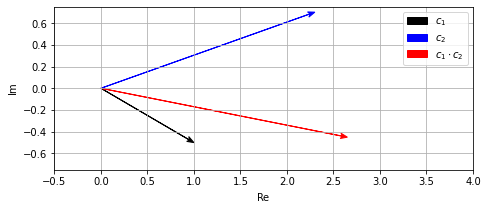

In [6]:
c1 = 1.0 - 0.5j
c2 = 2.3 + 0.7j
c = c1 * c2

generate_figure(figsize=(7.5, 3), xlim=[-0.5, 4.0], ylim=[-0.75, 0.75])
v1 = plot_vector(c1, color='k')
v2 = plot_vector(c2, color='b')
v3 = plot_vector(c, color='r')
plt.legend([v1, v2, v3], ['$c_1$', '$c_2$', '$c_1 \cdot c_2$']);

Given a complex number $c = a + bi$, the **complex conjugation** is defined by $\overline{c} := a - bi$. Many computations can be expressed in a more compact form using the complex conjugate. The following identities hold:
As for the real and imaginary part as well as the absolute value, one has:

\begin{eqnarray}
a &=& \frac{1}{2} (c+\overline{c}) \\
b &=& \frac{1}{2i} (c-\overline{c}) \\
|c|^2 &=& c\cdot \overline{c}\\
\overline{c_1+c_2} &=& \overline{c_1} + \overline{c_2}\\
\overline{c_1\cdot c_2} &=& \overline{c_1} \cdot \overline{c_2}
\end{eqnarray}

Geometrically, conjugation is reflection on the real axis.

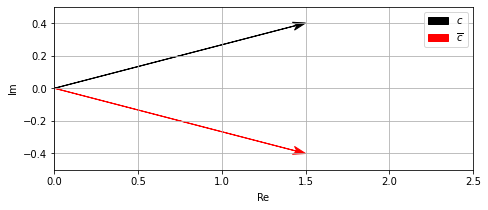

In [7]:
c = 1.5 + 0.4j
c_conj = np.conj(c)

generate_figure(figsize=(7.5, 3), xlim=[0, 2.5], ylim=[-0.5, 0.5])
v1 = plot_vector(c, color='k')
v2 = plot_vector(c_conj, color='r')

plt.legend([v1, v2], ['$c$', r'$\overline{c}$']);

For a non-zero complex number $c = a + bi$, there is an **inverse** complex number $c^{-1}$ with the property that $c\cdot c^{-1} = 1$. The inverse is given by:

$$c^{-1} := \frac{a}{a^2 + b^2} + i \frac{-b}{a^2 + b^2} = \frac{a}{|c|^2} + i \frac{-b}{|c|^2} = \frac{\overline{c}}{|c|^2}.$$

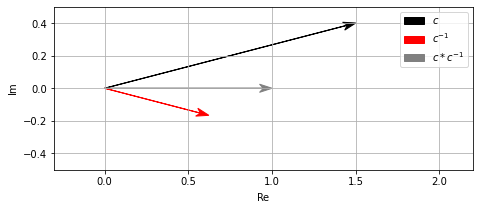

In [8]:
c = 1.5 + 0.4j
c_inv = 1 / c
c_prod = c * c_inv

generate_figure(figsize=(7.5, 3), xlim=[-0.3, 2.2], ylim=[-0.5, 0.5])
v1 = plot_vector(c, color='k')
v2 = plot_vector(c_inv, color='r')
v3 = plot_vector(c_prod, color='gray')

plt.legend([v1, v2, v3], ['$c$', '$c^{-1}$', '$c*c^{-1}$']);

With the inverse, division can be defined:
    
$$\frac{c_1}{c_2} = c_1 c_2^{-1} = \frac{a_1 + ib_1}{a_2 + ib_2} := \frac{a_1a_2 + b_1b_2}{a_2^2 + b_2^2} + i\frac{b_1a_2 - a_1b_2}{a_2^2 + b_2^2} =  \frac{c_1\cdot c_2}{|c_2|^2}.$$

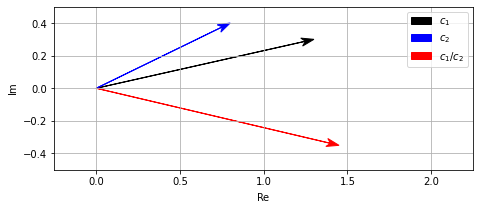

In [9]:
c1 = 1.3 + 0.3j
c2 = 0.8 + 0.4j
c = c1 / c2

generate_figure(figsize=(7.5, 3), xlim=[-0.25, 2.25], ylim=[-0.5, 0.5])
v1 = plot_vector(c1, color='k')
v2 = plot_vector(c2, color='b')
v3 = plot_vector(c, color='r')

plt.legend([v1, v2, v3], ['$c_1$', '$c_2$', '$c_1/c_2$']);

## Polar Coordinate Plot

Finally, we show how complex vectors can be visualized in a polar coordinate plot. Also, the following code cell illustrates some functionalities of the Python libraries `numpy` and `matplotlib`.

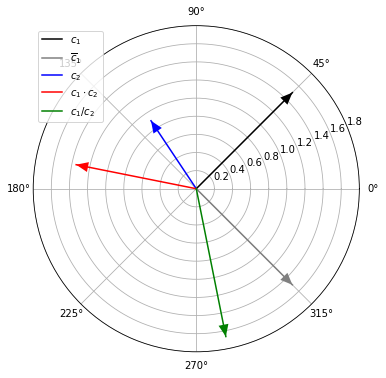

In [10]:
def plot_polar_vector(c, label=None, color=None, start=0, linestyle='-'):
    # plot line in polar plane
    line = plt.polar([np.angle(start), np.angle(c)], [np.abs(start), np.abs(c)], label=label, 
                     color=color, linestyle=linestyle)
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start), np.abs(start)), xy=(np.angle(c), np.abs(c)),
                 arrowprops=dict(facecolor=this_color, edgecolor='none', 
                                 headlength=12, headwidth=10, shrink=1, width=0))

#head_width=0.05, fc=color, ec=color, overhang=0.3, length_includes_head=True    
    
c_abs = 1.5
c_angle = 45  # in degree
c_angle_rad = np.deg2rad(c_angle) 
a = c_abs * np.cos(c_angle_rad)
b = c_abs * np.sin(c_angle_rad)
c1 = a + b*1j    
c2 = -0.5 + 0.75*1j

plt.figure(figsize=(6, 6))
plot_polar_vector(c1, label='$c_1$', color='k')
plot_polar_vector(np.conj(c1), label='$\overline{c}_1$', color='gray')
plot_polar_vector(c2, label='$c_2$', color='b')
plot_polar_vector(c1*c2, label='$c_1\cdot c_2$', color='r')
plot_polar_vector(c1/c2, label='$c_1/c_2$', color='g')

plt.ylim([0, 1.8]);
plt.legend();

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a> and <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>